In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [48]:
X=iris.data[:,0:2]
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [51]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(2,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [52]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit(X_train_scaled,y_train,epochs = 200, validation_data =(X_test_scaled,y_test))

Epoch 1/200
4/4 [==============================] - 1s 75ms/step - loss: 1.0785 - accuracy: 0.3417 - val_loss: 1.0626 - val_accuracy: 0.4000
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0614 - accuracy: 0.5500 - val_loss: 1.0459 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 1.0454 - accuracy: 0.6083 - val_loss: 1.0295 - val_accuracy: 0.5333
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 1.0304 - accuracy: 0.6083 - val_loss: 1.0146 - val_accuracy: 0.5667
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0160 - accuracy: 0.6333 - val_loss: 0.9995 - val_accuracy: 0.5667
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0010 - accuracy: 0.6333 - val_loss: 0.9832 - val_accuracy: 0.6000
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.9861 - accuracy: 0.6417 - val_loss: 0.9661 - val_accuracy: 0.6333
Epoch 8/200
4/4 [===

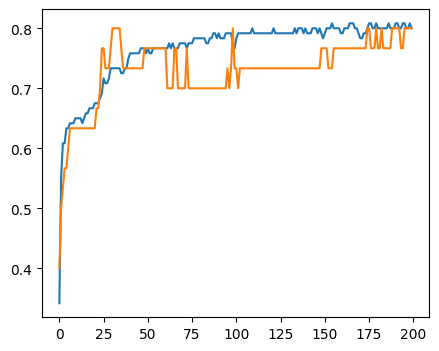

In [54]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

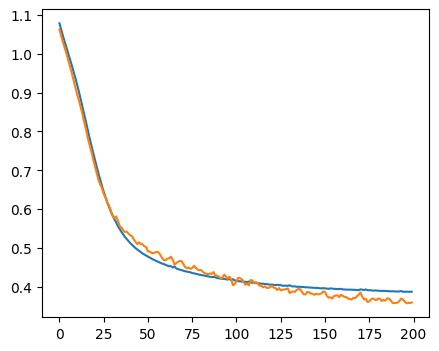

In [55]:
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Plot decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Regions using mlxtend')
plt.show()

**Add Dropout Layer**

In [17]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train_scaled,y_train,epochs = 300, validation_data =(X_test_scaled,y_test))

Epoch 1/300
4/4 [==============================] - 1s 80ms/step - loss: 1.0845 - accuracy: 0.4583 - val_loss: 1.0624 - val_accuracy: 0.6333
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0543 - accuracy: 0.5583 - val_loss: 1.0358 - val_accuracy: 0.6333
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 1.0556 - accuracy: 0.5083 - val_loss: 1.0106 - val_accuracy: 0.6333
Epoch 4/300
4/4 [==============================] - 0s 22ms/step - loss: 1.0209 - accuracy: 0.5500 - val_loss: 0.9848 - val_accuracy: 0.6333
Epoch 5/300
4/4 [==============================] - 0s 24ms/step - loss: 1.0162 - accuracy: 0.5667 - val_loss: 0.9576 - val_accuracy: 0.6000
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 0.9809 - accuracy: 0.5667 - val_loss: 0.9302 - val_accuracy: 0.4667
Epoch 7/300
4/4 [==============================] - 0s 17ms/step - loss: 0.9523 - accuracy: 0.6500 - val_loss: 0.9017 - val_accuracy: 0.6000
Epoch 8/300
4/4 [===

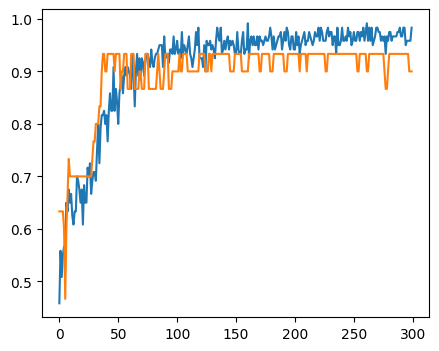

In [20]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

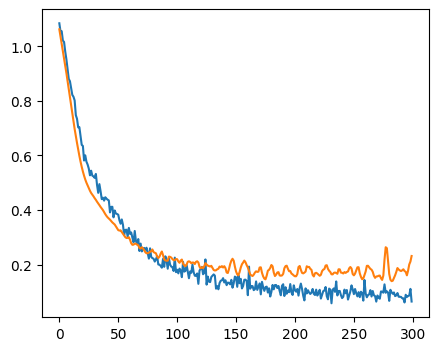

In [21]:
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [60]:
df = pd.read_csv('sonar_dataset.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [62]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [63]:
df.duplicated().sum()

0

In [71]:
X = df.iloc[:,0:-1]
y=df.iloc[:,-1]
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
model = Sequential()
model.add(Dense(60,activation='relu', input_shape=(60,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [106]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [107]:
history = model.fit(X,y_encoded,epochs=200,validation_split=0.2)

Epoch 1/200
6/6 [==============================] - 1s 50ms/step - loss: 0.7159 - accuracy: 0.4303 - val_loss: 0.6601 - val_accuracy: 0.9524
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6872 - accuracy: 0.5636 - val_loss: 0.7371 - val_accuracy: 0.0000e+00
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6758 - accuracy: 0.6424 - val_loss: 0.7853 - val_accuracy: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6678 - accuracy: 0.6364 - val_loss: 0.8029 - val_accuracy: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6606 - accuracy: 0.6606 - val_loss: 0.8027 - val_accuracy: 0.0000e+00
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6514 - accuracy: 0.7030 - val_loss: 0.8173 - val_accuracy: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6386 - accuracy: 0.7212 - val_loss: 0.8409 - val_accuracy: 0.0238
Epo

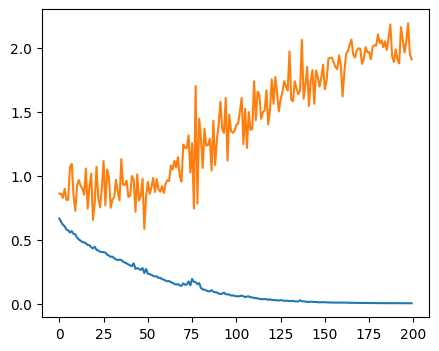

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

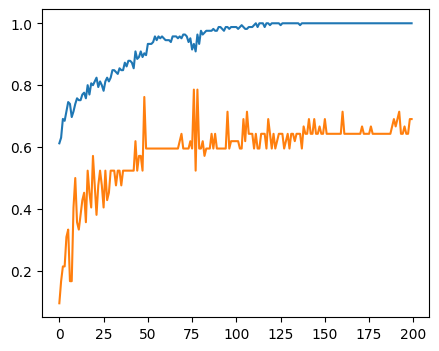

In [94]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

Add Dropout Layer

In [112]:
model = Sequential()
model.add(Dense(60,activation='relu', input_shape=(60,)))
model.add(Dropout(0.4))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [113]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X,y_encoded,epochs=200,validation_split=0.2)

Epoch 1/200
6/6 [==============================] - 1s 51ms/step - loss: 0.6858 - accuracy: 0.5697 - val_loss: 0.7393 - val_accuracy: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6794 - accuracy: 0.5697 - val_loss: 0.7566 - val_accuracy: 0.0000e+00
Epoch 3/200
6/6 [==============================] - 0s 16ms/step - loss: 0.6973 - accuracy: 0.5697 - val_loss: 0.7735 - val_accuracy: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 0.6898 - accuracy: 0.5697 - val_loss: 0.7782 - val_accuracy: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6680 - accuracy: 0.5939 - val_loss: 0.7890 - val_accuracy: 0.0000e+00
Epoch 6/200
6/6 [==============================] - 0s 16ms/step - loss: 0.6608 - accuracy: 0.5758 - val_loss: 0.7794 - val_accuracy: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 0s 15ms/step - loss: 0.6748 - accuracy: 0.5939 - val_loss: 0.7827 - val_accuracy: 0.00

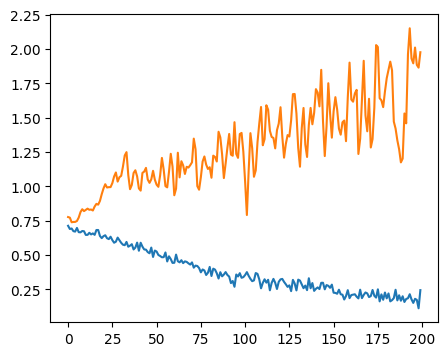

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()